In [30]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

pd.set_option('display.max_columns',100)
pd.set_option('display.precision',5)

In [31]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [32]:
# Function for one-hot-encoding
def onc(df,column):
  df[column] = df[column].fillna('others')
  n = df[column].nunique()
  from sklearn.preprocessing import OneHotEncoder
  enc = OneHotEncoder(sparse=False)
  df_col = np.array(df[column]).reshape(-1,1)
  df_col = enc.fit_transform(df_col)
  name_dir = []
  for i in range(n):
    name_dir.append(column + str(i))
  df_col = pd.DataFrame(df_col,columns=name_dir)
  df = df.join(df_col)
  df.drop(column,axis=1,inplace=True)
  return df

# Function for binary encoding
def bienc(df,column):
  from sklearn.preprocessing import LabelEncoder
  enc = LabelEncoder()
  df_col = np.array(df[column]).reshape(-1,1)
  df_col = enc.fit_transform(df_col)
  df_col = pd.DataFrame(df_col,columns=[column])
  df.drop(column,axis=1,inplace=True)
  df = df.join(df_col)
  
  return df

In [33]:
# importing data
df = pd.read_csv('/content/drive/MyDrive/train_indessa.csv')
df.head()

,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,batch_enrolled,int_rate,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,pymnt_plan,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,collections_12_mths_ex_med,mths_since_last_major_derog,application_type,verification_status_joint,last_week_pay,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,loan_status
0,58189336,14350,14350,14350.0,36 months,,19.19,E,E3,clerk,9 years,OWN,28700.0,Source Verified,n,NaN,debt_consolidation,Debt consolidation,349xx,FL,33.88,0.0,1.0,50.0,75.0,14.0,1.0,22515.0,73.1,28.0,f,1173.84,0.0,0.0,0.0,0.0,74.0,INDIVIDUAL,NaN,26th week,0.0,0.0,28699.0,30800.0,0
1,70011223,4800,4800,4800.0,36 months,BAT1586599,10.99,B,B4,Human Resources Specialist,< 1 year,MORTGAGE,65000.0,Source Verified,n,NaN,home_improvement,Home improvement,209xx,MD,3.64,0.0,1.0,NaN,NaN,6.0,0.0,7624.0,23.2,13.0,w,83.95,0.0,0.0,0.0,0.0,NaN,INDIVIDUAL,NaN,9th week,0.0,0.0,9974.0,32900.0,0
2,70255675,10000,10000,10000.0,36 months,BAT1586599,7.26,A,A4,Driver,2 years,OWN,45000.0,Not Verified,n,NaN,debt_consolidation,Debt consolidation,447xx,OH,18.42,0.0,0.0,NaN,NaN,5.0,0.0,10877.0,31.2,19.0,w,56.47,0.0,0.0,0.0,0.0,NaN,INDIVIDUAL,NaN,9th week,0.0,65.0,38295.0,34900.0,0
3,1893936,15000,15000,15000.0,36 months,BAT4808022,19.72,D,D5,Us office of Personnel Management,10+ years,RENT,105000.0,Not Verified,n,> My goal is to obtain a loan to pay off my hi...,debt_consolidation,Debt consolidation,221xx,VA,14.97,0.0,2.0,46.0,NaN,10.0,0.0,13712.0,55.5,21.0,f,4858.62,0.0,0.0,0.0,0.0,NaN,INDIVIDUAL,NaN,135th week,0.0,0.0,55564.0,24700.0,0
4,7652106,16000,16000,16000.0,36 months,BAT2833642,10.64,B,B2,LAUSD-HOLLYWOOD HIGH SCHOOL,10+ years,RENT,52000.0,Verified,n,NaN,credit_card,refi,900xx,CA,20.16,0.0,0.0,NaN,NaN,11.0,0.0,35835.0,76.2,27.0,w,2296.41,0.0,0.0,0.0,0.0,NaN,INDIVIDUAL,NaN,96th week,0.0,0.0,47159.0,47033.0,0


In [34]:
df.shape

(532428, 45)

Thus the data has 5,32,428 records and 45 features including the target feature.

In [35]:
# Stats of numeric features
df.describe()

,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,collections_12_mths_ex_med,mths_since_last_major_derog,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,loan_status
count,5.32428e+05,532428.00000,532428.00000,532428.00000,532428.00000,5.32425e+05,532428.00000,532412.00000,532412.00000,259874.00000,82123.00000,532412.00000,532412.00000,5.32428e+05,532141.00000,532412.00000,532428.00000,532428.00000,532428.00000,532428.00000,532333.00000,132980.00000,532412.00000,490424.00000,4.90424e+05,4.90424e+05,532428.00000
mean,3.50055e+07,14757.59572,14744.27129,14704.92670,13.24297,7.50298e+04,18.13877,0.31445,0.69460,34.05573,70.09307,11.54559,0.19486,1.69213e+04,55.05719,25.26736,1753.42879,0.39495,45.71783,4.85922,0.01430,44.12146,0.00501,213.56222,1.39554e+05,3.20806e+04,0.23633
std,2.41215e+07,8434.42008,8429.13928,8441.29038,4.37961,6.51998e+04,8.36907,0.86004,0.99703,21.88480,28.13922,5.31144,0.58382,2.24232e+04,23.85344,11.84321,2093.19984,4.09155,409.64747,63.12336,0.13301,22.19841,0.07912,1958.57154,1.53915e+05,3.80530e+04,0.42483
min,7.04730e+04,500.00000,500.00000,0.00000,5.32000,1.20000e+03,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000e+00,0.00000,1.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000e+00,0.00000e+00,0.00000
25%,1.08669e+07,8000.00000,8000.00000,8000.00000,9.99000,4.50000e+04,11.93000,0.00000,0.00000,15.00000,51.00000,8.00000,0.00000,6.44400e+03,37.70000,17.00000,441.60000,0.00000,0.00000,0.00000,0.00000,27.00000,0.00000,0.00000,2.98398e+04,1.40000e+04,0.00000
50%,3.70959e+07,13000.00000,13000.00000,13000.00000,12.99000,6.50000e+04,17.65000,0.00000,0.00000,31.00000,70.00000,11.00000,0.00000,1.18760e+04,56.00000,24.00000,1072.69000,0.00000,0.00000,0.00000,0.00000,44.00000,0.00000,0.00000,8.06695e+04,2.37000e+04,0.00000
75%,5.84892e+07,20000.00000,20000.00000,20000.00000,16.20000,9.00000e+04,23.95000,0.00000,1.00000,50.00000,92.00000,14.00000,0.00000,2.08430e+04,73.60000,32.00000,2234.73500,0.00000,0.00000,0.00000,0.00000,61.00000,0.00000,0.00000,2.08479e+05,3.98000e+04,0.00000
max,7.35448e+07,35000.00000,35000.00000,35000.00000,28.99000,9.50000e+06,672.52000,30.00000,31.00000,180.00000,121.00000,90.00000,86.00000,2.56900e+06,892.30000,162.00000,24205.62000,358.68000,33520.27000,7002.19000,16.00000,180.00000,14.00000,496651.00000,8.00008e+06,1.00000e+07,1.00000


In [36]:
# Stats of object type features
df.describe(include=['object'])

,term,batch_enrolled,grade,sub_grade,emp_title,emp_length,home_ownership,verification_status,pymnt_plan,desc,purpose,title,zip_code,addr_state,initial_list_status,application_type,verification_status_joint,last_week_pay
count,532428,447279,532428,532428,501595,505537,532428,532428,532428,75599,532428,532338,532428,532428,532428,532428,305,532428
unique,2,104,7,35,190124,11,6,3,2,70638,14,39693,917,51,2,2,3,98
top,36 months,,B,B3,Teacher,10+ years,MORTGAGE,Source Verified,n,> Debt consolidation<br>,debt_consolidation,Debt consolidation,945xx,CA,f,INDIVIDUAL,Not Verified,13th week
freq,372793,106079,152713,33844,8280,175105,265940,197750,532420,576,314989,248967,5845,77911,274018,532123,170,30333


Firstly, columns that are irrelevant to the problem statement and hardly hold any significance in our analysis have been removed. These are ‘batch_enrolled’, ‘member_id’, ‘zip_code’ and ‘addr_state’. 

In [37]:
df.drop(['batch_enrolled','member_id','zip_code','addr_state'],axis=1,inplace=True)
df.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,pymnt_plan,desc,purpose,title,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,collections_12_mths_ex_med,mths_since_last_major_derog,application_type,verification_status_joint,last_week_pay,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,loan_status
0,14350,14350,14350.0,36 months,19.19,E,E3,clerk,9 years,OWN,28700.0,Source Verified,n,NaN,debt_consolidation,Debt consolidation,33.88,0.0,1.0,50.0,75.0,14.0,1.0,22515.0,73.1,28.0,f,1173.84,0.0,0.0,0.0,0.0,74.0,INDIVIDUAL,NaN,26th week,0.0,0.0,28699.0,30800.0,0
1,4800,4800,4800.0,36 months,10.99,B,B4,Human Resources Specialist,< 1 year,MORTGAGE,65000.0,Source Verified,n,NaN,home_improvement,Home improvement,3.64,0.0,1.0,NaN,NaN,6.0,0.0,7624.0,23.2,13.0,w,83.95,0.0,0.0,0.0,0.0,NaN,INDIVIDUAL,NaN,9th week,0.0,0.0,9974.0,32900.0,0
2,10000,10000,10000.0,36 months,7.26,A,A4,Driver,2 years,OWN,45000.0,Not Verified,n,NaN,debt_consolidation,Debt consolidation,18.42,0.0,0.0,NaN,NaN,5.0,0.0,10877.0,31.2,19.0,w,56.47,0.0,0.0,0.0,0.0,NaN,INDIVIDUAL,NaN,9th week,0.0,65.0,38295.0,34900.0,0
3,15000,15000,15000.0,36 months,19.72,D,D5,Us office of Personnel Management,10+ years,RENT,105000.0,Not Verified,n,> My goal is to obtain a loan to pay off my hi...,debt_consolidation,Debt consolidation,14.97,0.0,2.0,46.0,NaN,10.0,0.0,13712.0,55.5,21.0,f,4858.62,0.0,0.0,0.0,0.0,NaN,INDIVIDUAL,NaN,135th week,0.0,0.0,55564.0,24700.0,0
4,16000,16000,16000.0,36 months,10.64,B,B2,LAUSD-HOLLYWOOD HIGH SCHOOL,10+ years,RENT,52000.0,Verified,n,NaN,credit_card,refi,20.16,0.0,0.0,NaN,NaN,11.0,0.0,35835.0,76.2,27.0,w,2296.41,0.0,0.0,0.0,0.0,NaN,INDIVIDUAL,NaN,96th week,0.0,0.0,47159.0,47033.0,0


In [38]:
df.describe(include=['object'])

,term,grade,sub_grade,emp_title,emp_length,home_ownership,verification_status,pymnt_plan,desc,purpose,title,initial_list_status,application_type,verification_status_joint,last_week_pay
count,532428,532428,532428,501595,505537,532428,532428,532428,75599,532428,532338,532428,532428,305,532428
unique,2,7,35,190124,11,6,3,2,70638,14,39693,2,2,3,98
top,36 months,B,B3,Teacher,10+ years,MORTGAGE,Source Verified,n,> Debt consolidation<br>,debt_consolidation,Debt consolidation,f,INDIVIDUAL,Not Verified,13th week
freq,372793,152713,33844,8280,175105,265940,197750,532420,576,314989,248967,274018,532123,170,30333


Some columns have missing values for more than 50% of the record. They contain very less information. such columns are of no use to the model and have been identified form the df. describe method for numeric and categorical features. They were subsequently dropped.

In [39]:
l = ['desc','verification_status_joint','mths_since_last_major_derog','mths_since_last_delinq','mths_since_last_record']
pd.DataFrame(df[l].isna().sum(),columns = ['missing_value_count'])

,missing_value_count
desc,456829
verification_status_joint,532123
mths_since_last_major_derog,399448
mths_since_last_delinq,272554
mths_since_last_record,450305


In [40]:
df.drop(l,axis=1,inplace=True)
df.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,pymnt_plan,purpose,title,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,collections_12_mths_ex_med,application_type,last_week_pay,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,loan_status
0,14350,14350,14350.0,36 months,19.19,E,E3,clerk,9 years,OWN,28700.0,Source Verified,n,debt_consolidation,Debt consolidation,33.88,0.0,1.0,14.0,1.0,22515.0,73.1,28.0,f,1173.84,0.0,0.0,0.0,0.0,INDIVIDUAL,26th week,0.0,0.0,28699.0,30800.0,0
1,4800,4800,4800.0,36 months,10.99,B,B4,Human Resources Specialist,< 1 year,MORTGAGE,65000.0,Source Verified,n,home_improvement,Home improvement,3.64,0.0,1.0,6.0,0.0,7624.0,23.2,13.0,w,83.95,0.0,0.0,0.0,0.0,INDIVIDUAL,9th week,0.0,0.0,9974.0,32900.0,0
2,10000,10000,10000.0,36 months,7.26,A,A4,Driver,2 years,OWN,45000.0,Not Verified,n,debt_consolidation,Debt consolidation,18.42,0.0,0.0,5.0,0.0,10877.0,31.2,19.0,w,56.47,0.0,0.0,0.0,0.0,INDIVIDUAL,9th week,0.0,65.0,38295.0,34900.0,0
3,15000,15000,15000.0,36 months,19.72,D,D5,Us office of Personnel Management,10+ years,RENT,105000.0,Not Verified,n,debt_consolidation,Debt consolidation,14.97,0.0,2.0,10.0,0.0,13712.0,55.5,21.0,f,4858.62,0.0,0.0,0.0,0.0,INDIVIDUAL,135th week,0.0,0.0,55564.0,24700.0,0
4,16000,16000,16000.0,36 months,10.64,B,B2,LAUSD-HOLLYWOOD HIGH SCHOOL,10+ years,RENT,52000.0,Verified,n,credit_card,refi,20.16,0.0,0.0,11.0,0.0,35835.0,76.2,27.0,w,2296.41,0.0,0.0,0.0,0.0,INDIVIDUAL,96th week,0.0,0.0,47159.0,47033.0,0


In [41]:
df.describe(include=['object'])

,term,grade,sub_grade,emp_title,emp_length,home_ownership,verification_status,pymnt_plan,purpose,title,initial_list_status,application_type,last_week_pay
count,532428,532428,532428,501595,505537,532428,532428,532428,532428,532338,532428,532428,532428
unique,2,7,35,190124,11,6,3,2,14,39693,2,2,98
top,36 months,B,B3,Teacher,10+ years,MORTGAGE,Source Verified,n,debt_consolidation,Debt consolidation,f,INDIVIDUAL,13th week
freq,372793,152713,33844,8280,175105,265940,197750,532420,314989,248967,274018,532123,30333


As shown in the above table, 'application_type', 'initial_list_status', 'pymnt_plan' and 'term' have 2 unique values with no NaN values. They will be encoded with 0 and 1. However first we plot their histograms for each class.

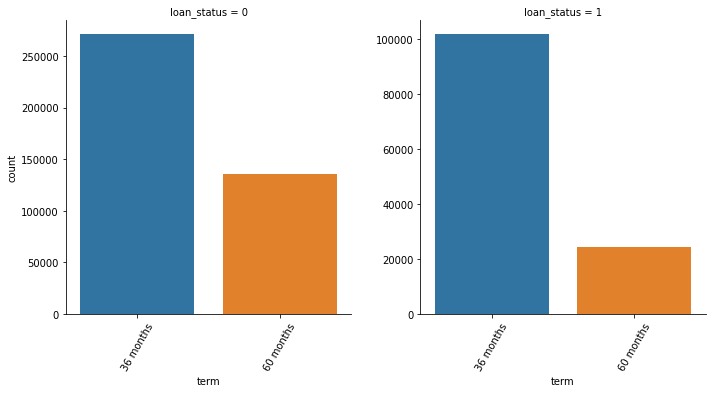

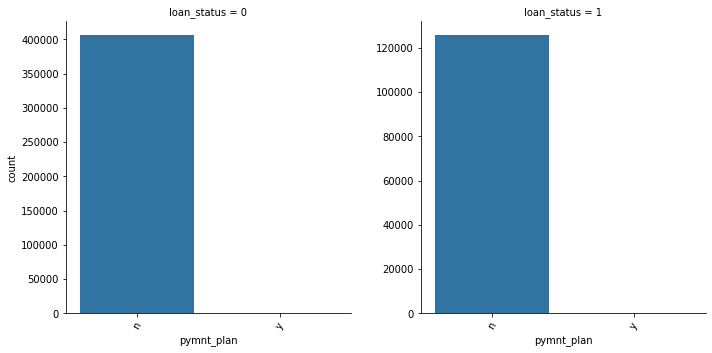

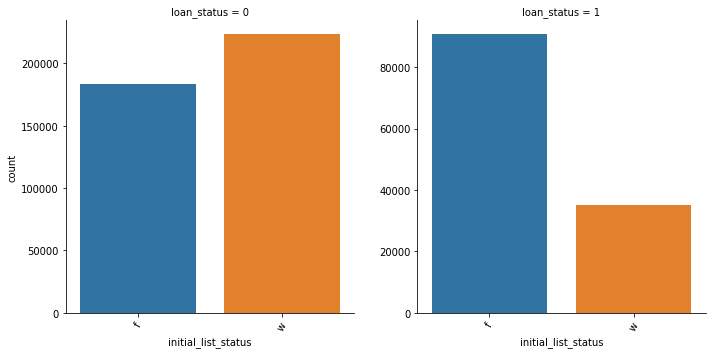

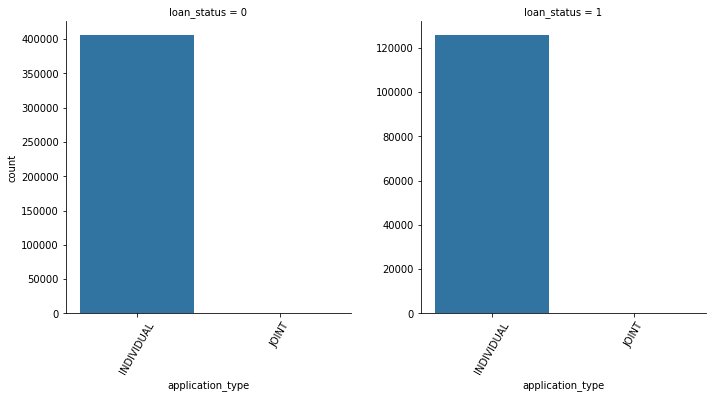

In [42]:
for col in df.select_dtypes(include='object'):
    if df[col].nunique() <= 2:
        g = sns.catplot(x = col, kind='count', col = 'loan_status', data=df, sharey=False)
        g.set_xticklabels(rotation=60)

The frequency plot for both target categories suggested that ‘pymnt_plan’ and ‘application_type’ hardly show any different values with respect to target categories (evident from the graphs below). Hence, they have been removed. The remaining two namely ‘initial_list_status’ and term have been encoded with labels ‘0’ and ‘1’.

In [43]:
df.drop(['application_type','pymnt_plan'],axis=1,inplace=True)
df.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,purpose,title,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,collections_12_mths_ex_med,last_week_pay,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,loan_status
0,14350,14350,14350.0,36 months,19.19,E,E3,clerk,9 years,OWN,28700.0,Source Verified,debt_consolidation,Debt consolidation,33.88,0.0,1.0,14.0,1.0,22515.0,73.1,28.0,f,1173.84,0.0,0.0,0.0,0.0,26th week,0.0,0.0,28699.0,30800.0,0
1,4800,4800,4800.0,36 months,10.99,B,B4,Human Resources Specialist,< 1 year,MORTGAGE,65000.0,Source Verified,home_improvement,Home improvement,3.64,0.0,1.0,6.0,0.0,7624.0,23.2,13.0,w,83.95,0.0,0.0,0.0,0.0,9th week,0.0,0.0,9974.0,32900.0,0
2,10000,10000,10000.0,36 months,7.26,A,A4,Driver,2 years,OWN,45000.0,Not Verified,debt_consolidation,Debt consolidation,18.42,0.0,0.0,5.0,0.0,10877.0,31.2,19.0,w,56.47,0.0,0.0,0.0,0.0,9th week,0.0,65.0,38295.0,34900.0,0
3,15000,15000,15000.0,36 months,19.72,D,D5,Us office of Personnel Management,10+ years,RENT,105000.0,Not Verified,debt_consolidation,Debt consolidation,14.97,0.0,2.0,10.0,0.0,13712.0,55.5,21.0,f,4858.62,0.0,0.0,0.0,0.0,135th week,0.0,0.0,55564.0,24700.0,0
4,16000,16000,16000.0,36 months,10.64,B,B2,LAUSD-HOLLYWOOD HIGH SCHOOL,10+ years,RENT,52000.0,Verified,credit_card,refi,20.16,0.0,0.0,11.0,0.0,35835.0,76.2,27.0,w,2296.41,0.0,0.0,0.0,0.0,96th week,0.0,0.0,47159.0,47033.0,0


In [44]:
df = bienc(df,'initial_list_status')
df = bienc(df,'term')
df.head()

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,purpose,title,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,collections_12_mths_ex_med,last_week_pay,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,loan_status,initial_list_status,term
0,14350,14350,14350.0,19.19,E,E3,clerk,9 years,OWN,28700.0,Source Verified,debt_consolidation,Debt consolidation,33.88,0.0,1.0,14.0,1.0,22515.0,73.1,28.0,1173.84,0.0,0.0,0.0,0.0,26th week,0.0,0.0,28699.0,30800.0,0,0,0
1,4800,4800,4800.0,10.99,B,B4,Human Resources Specialist,< 1 year,MORTGAGE,65000.0,Source Verified,home_improvement,Home improvement,3.64,0.0,1.0,6.0,0.0,7624.0,23.2,13.0,83.95,0.0,0.0,0.0,0.0,9th week,0.0,0.0,9974.0,32900.0,0,1,0
2,10000,10000,10000.0,7.26,A,A4,Driver,2 years,OWN,45000.0,Not Verified,debt_consolidation,Debt consolidation,18.42,0.0,0.0,5.0,0.0,10877.0,31.2,19.0,56.47,0.0,0.0,0.0,0.0,9th week,0.0,65.0,38295.0,34900.0,0,1,0
3,15000,15000,15000.0,19.72,D,D5,Us office of Personnel Management,10+ years,RENT,105000.0,Not Verified,debt_consolidation,Debt consolidation,14.97,0.0,2.0,10.0,0.0,13712.0,55.5,21.0,4858.62,0.0,0.0,0.0,0.0,135th week,0.0,0.0,55564.0,24700.0,0,0,0
4,16000,16000,16000.0,10.64,B,B2,LAUSD-HOLLYWOOD HIGH SCHOOL,10+ years,RENT,52000.0,Verified,credit_card,refi,20.16,0.0,0.0,11.0,0.0,35835.0,76.2,27.0,2296.41,0.0,0.0,0.0,0.0,96th week,0.0,0.0,47159.0,47033.0,0,1,0


The column ‘grade’ and ‘subgrade’ inform the category assigned to each applicant by the bank based on their credit score. The categories are ‘A’, ‘B’, ‘C’, ‘D’, ‘E’, ‘F’ and ‘G’ with subcategories as ‘A1’, ‘A2’, …., ‘A5’, ‘B1’ and so on. To handle these, we came up with an encoding where the ‘grade’ will determine the integer part of the code whereas the ‘subgrade’ the decimal part. Here we have assuming the categories have certain hierarchy. (A<B<C<D<E<F<G and A1<A2<A3<A4<A5). A will be assigned 1, B assigned 2 and so on. A1 will be assigned 1.0, A2: 1.2, A3 : 1.4, A4 : 1.6 and A5 : 1.8 and then B1 : 2.0 and so on.

In [45]:
df.drop('grade',axis=1,inplace=True)
grades = list(df['sub_grade'].unique())
dir = {}
for grade in grades:
  int_part = ord(grade[0])-64
  dec_part = 0.2*(int(grade[1])-1)
  dir[grade] = int_part + dec_part
for grade in grades:
  df.loc[df['sub_grade']==grade,'sub_grade'] = dir[grade]

df.head()

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,purpose,title,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,collections_12_mths_ex_med,last_week_pay,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,loan_status,initial_list_status,term
0,14350,14350,14350.0,19.19,5.4,clerk,9 years,OWN,28700.0,Source Verified,debt_consolidation,Debt consolidation,33.88,0.0,1.0,14.0,1.0,22515.0,73.1,28.0,1173.84,0.0,0.0,0.0,0.0,26th week,0.0,0.0,28699.0,30800.0,0,0,0
1,4800,4800,4800.0,10.99,2.6,Human Resources Specialist,< 1 year,MORTGAGE,65000.0,Source Verified,home_improvement,Home improvement,3.64,0.0,1.0,6.0,0.0,7624.0,23.2,13.0,83.95,0.0,0.0,0.0,0.0,9th week,0.0,0.0,9974.0,32900.0,0,1,0
2,10000,10000,10000.0,7.26,1.6,Driver,2 years,OWN,45000.0,Not Verified,debt_consolidation,Debt consolidation,18.42,0.0,0.0,5.0,0.0,10877.0,31.2,19.0,56.47,0.0,0.0,0.0,0.0,9th week,0.0,65.0,38295.0,34900.0,0,1,0
3,15000,15000,15000.0,19.72,4.8,Us office of Personnel Management,10+ years,RENT,105000.0,Not Verified,debt_consolidation,Debt consolidation,14.97,0.0,2.0,10.0,0.0,13712.0,55.5,21.0,4858.62,0.0,0.0,0.0,0.0,135th week,0.0,0.0,55564.0,24700.0,0,0,0
4,16000,16000,16000.0,10.64,2.2,LAUSD-HOLLYWOOD HIGH SCHOOL,10+ years,RENT,52000.0,Verified,credit_card,refi,20.16,0.0,0.0,11.0,0.0,35835.0,76.2,27.0,2296.41,0.0,0.0,0.0,0.0,96th week,0.0,0.0,47159.0,47033.0,0,1,0


The column ‘emp_title’ is also very important but it contains text data with nearly 1,90,000 unique entries. So, it was inconvenient to convert this to numerical data. Also, we assumed that this factor was considered while assigning the grades. So, this column was dropped.
The column ‘title’ also had a similar problem with around 35000 unique entries. This was also dropped. 


In [46]:
df.drop(['emp_title','title'],axis=1,inplace=True)
df.head()

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,sub_grade,emp_length,home_ownership,annual_inc,verification_status,purpose,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,collections_12_mths_ex_med,last_week_pay,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,loan_status,initial_list_status,term
0,14350,14350,14350.0,19.19,5.4,9 years,OWN,28700.0,Source Verified,debt_consolidation,33.88,0.0,1.0,14.0,1.0,22515.0,73.1,28.0,1173.84,0.0,0.0,0.0,0.0,26th week,0.0,0.0,28699.0,30800.0,0,0,0
1,4800,4800,4800.0,10.99,2.6,< 1 year,MORTGAGE,65000.0,Source Verified,home_improvement,3.64,0.0,1.0,6.0,0.0,7624.0,23.2,13.0,83.95,0.0,0.0,0.0,0.0,9th week,0.0,0.0,9974.0,32900.0,0,1,0
2,10000,10000,10000.0,7.26,1.6,2 years,OWN,45000.0,Not Verified,debt_consolidation,18.42,0.0,0.0,5.0,0.0,10877.0,31.2,19.0,56.47,0.0,0.0,0.0,0.0,9th week,0.0,65.0,38295.0,34900.0,0,1,0
3,15000,15000,15000.0,19.72,4.8,10+ years,RENT,105000.0,Not Verified,debt_consolidation,14.97,0.0,2.0,10.0,0.0,13712.0,55.5,21.0,4858.62,0.0,0.0,0.0,0.0,135th week,0.0,0.0,55564.0,24700.0,0,0,0
4,16000,16000,16000.0,10.64,2.2,10+ years,RENT,52000.0,Verified,credit_card,20.16,0.0,0.0,11.0,0.0,35835.0,76.2,27.0,2296.41,0.0,0.0,0.0,0.0,96th week,0.0,0.0,47159.0,47033.0,0,1,0


Now, we plot histograms for non-numeric features having more than 2 unique entries.

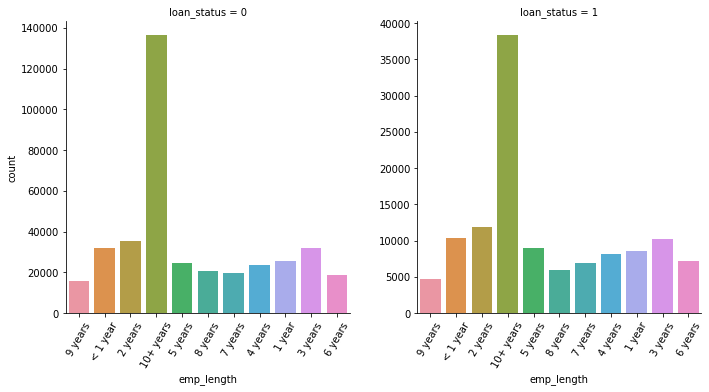

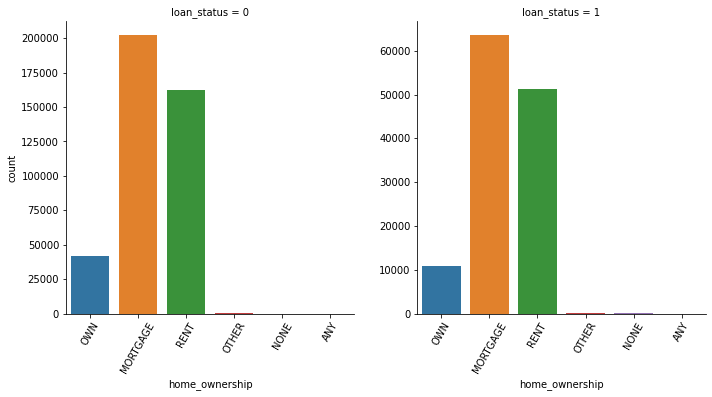

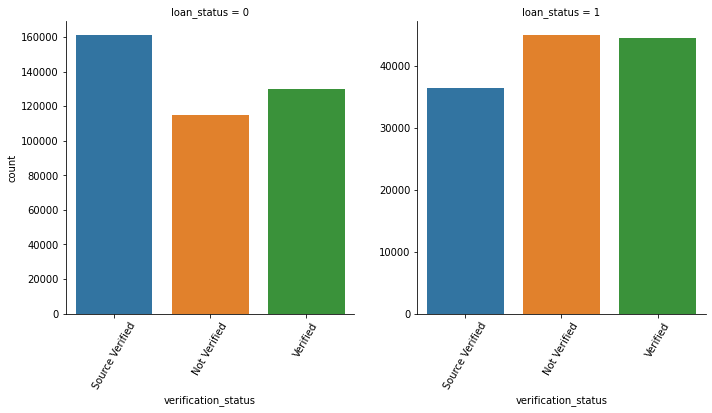

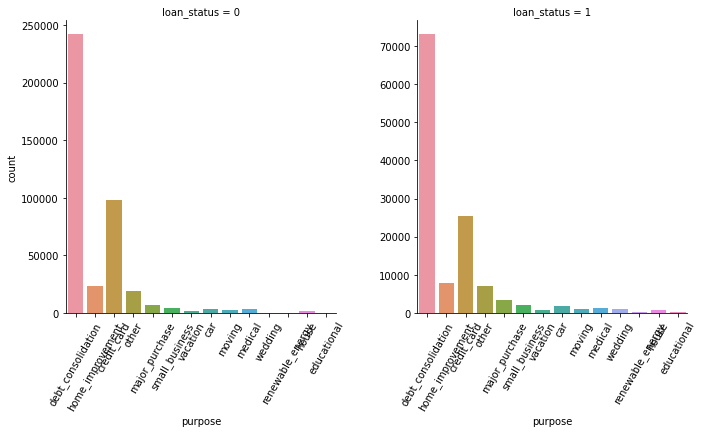

In [47]:
for col in df.select_dtypes(include='object'):
    if df[col].nunique() <= 30 and df[col].nunique()>2:
        g = sns.catplot(x = col, kind='count', col = 'loan_status', data=df, sharey=False)
        g.set_xticklabels(rotation=60)

The columns ‘purpose’, ‘emp_length’, ‘verification_status’ and ‘home_ownership’ show more than 2 unique entries and can’t be encoded with 0 and 1. Here from the histogram plots we observe that ‘emp_length’, ‘purpose’ and ‘home_ownership’ have same distribution for both 0s (Non-defaulters) and 1s (Defaulters). So, they are not good predictors of defaulting and have been dropped. However, the other column ‘verification_status’ has been encoded using One-Hot-Encoding. To handle NaN values in these columns, a separate ‘others’ category has been added

In [48]:
df.drop(['emp_length','purpose','home_ownership'],axis=1,inplace=True)
df.head()

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,sub_grade,annual_inc,verification_status,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,collections_12_mths_ex_med,last_week_pay,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,loan_status,initial_list_status,term
0,14350,14350,14350.0,19.19,5.4,28700.0,Source Verified,33.88,0.0,1.0,14.0,1.0,22515.0,73.1,28.0,1173.84,0.0,0.0,0.0,0.0,26th week,0.0,0.0,28699.0,30800.0,0,0,0
1,4800,4800,4800.0,10.99,2.6,65000.0,Source Verified,3.64,0.0,1.0,6.0,0.0,7624.0,23.2,13.0,83.95,0.0,0.0,0.0,0.0,9th week,0.0,0.0,9974.0,32900.0,0,1,0
2,10000,10000,10000.0,7.26,1.6,45000.0,Not Verified,18.42,0.0,0.0,5.0,0.0,10877.0,31.2,19.0,56.47,0.0,0.0,0.0,0.0,9th week,0.0,65.0,38295.0,34900.0,0,1,0
3,15000,15000,15000.0,19.72,4.8,105000.0,Not Verified,14.97,0.0,2.0,10.0,0.0,13712.0,55.5,21.0,4858.62,0.0,0.0,0.0,0.0,135th week,0.0,0.0,55564.0,24700.0,0,0,0
4,16000,16000,16000.0,10.64,2.2,52000.0,Verified,20.16,0.0,0.0,11.0,0.0,35835.0,76.2,27.0,2296.41,0.0,0.0,0.0,0.0,96th week,0.0,0.0,47159.0,47033.0,0,1,0


In [49]:
df = onc(df,'verification_status')
df.head()

,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,sub_grade,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,collections_12_mths_ex_med,last_week_pay,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,loan_status,initial_list_status,term,verification_status0,verification_status1,verification_status2
0,14350,14350,14350.0,19.19,5.4,28700.0,33.88,0.0,1.0,14.0,1.0,22515.0,73.1,28.0,1173.84,0.0,0.0,0.0,0.0,26th week,0.0,0.0,28699.0,30800.0,0,0,0,0.0,1.0,0.0
1,4800,4800,4800.0,10.99,2.6,65000.0,3.64,0.0,1.0,6.0,0.0,7624.0,23.2,13.0,83.95,0.0,0.0,0.0,0.0,9th week,0.0,0.0,9974.0,32900.0,0,1,0,0.0,1.0,0.0
2,10000,10000,10000.0,7.26,1.6,45000.0,18.42,0.0,0.0,5.0,0.0,10877.0,31.2,19.0,56.47,0.0,0.0,0.0,0.0,9th week,0.0,65.0,38295.0,34900.0,0,1,0,1.0,0.0,0.0
3,15000,15000,15000.0,19.72,4.8,105000.0,14.97,0.0,2.0,10.0,0.0,13712.0,55.5,21.0,4858.62,0.0,0.0,0.0,0.0,135th week,0.0,0.0,55564.0,24700.0,0,0,0,1.0,0.0,0.0
4,16000,16000,16000.0,10.64,2.2,52000.0,20.16,0.0,0.0,11.0,0.0,35835.0,76.2,27.0,2296.41,0.0,0.0,0.0,0.0,96th week,0.0,0.0,47159.0,47033.0,0,1,0,0.0,0.0,1.0


Focussing on numeric features. We plotted the heatmap using Pearson correlation coefficient.

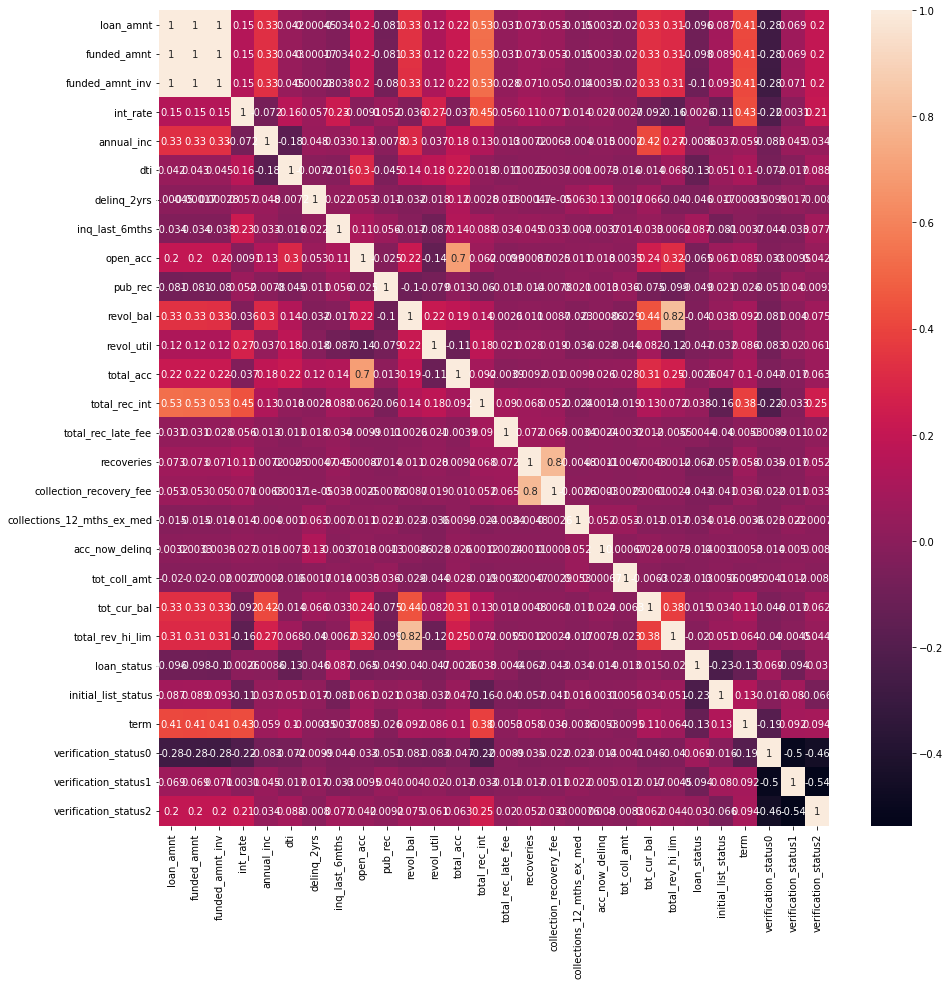

In [50]:
fig, ax = plt.subplots(figsize=(15, 15))

ax = sns.heatmap(df.corr(), annot=True)

From the heatmap plotted with Pearson Correlation coefficient for all numeric columns, we came to know that the columns ‘funded_amnt_inv’, ‘funded_amnt’, ‘loan_amnt’ have very strong positive correlation. Although they have different meanings, they provide redundant information to our ML model and so, the features ‘funded_amnt_inv’ and ‘loan_amnt’ were removed and only ‘funded_amnt’ was kept. 

In [51]:
df.drop(['funded_amnt_inv','loan_amnt'],axis=1,inplace=True)
df.head()

,funded_amnt,int_rate,sub_grade,annual_inc,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,collections_12_mths_ex_med,last_week_pay,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,loan_status,initial_list_status,term,verification_status0,verification_status1,verification_status2
0,14350,19.19,5.4,28700.0,33.88,0.0,1.0,14.0,1.0,22515.0,73.1,28.0,1173.84,0.0,0.0,0.0,0.0,26th week,0.0,0.0,28699.0,30800.0,0,0,0,0.0,1.0,0.0
1,4800,10.99,2.6,65000.0,3.64,0.0,1.0,6.0,0.0,7624.0,23.2,13.0,83.95,0.0,0.0,0.0,0.0,9th week,0.0,0.0,9974.0,32900.0,0,1,0,0.0,1.0,0.0
2,10000,7.26,1.6,45000.0,18.42,0.0,0.0,5.0,0.0,10877.0,31.2,19.0,56.47,0.0,0.0,0.0,0.0,9th week,0.0,65.0,38295.0,34900.0,0,1,0,1.0,0.0,0.0
3,15000,19.72,4.8,105000.0,14.97,0.0,2.0,10.0,0.0,13712.0,55.5,21.0,4858.62,0.0,0.0,0.0,0.0,135th week,0.0,0.0,55564.0,24700.0,0,0,0,1.0,0.0,0.0
4,16000,10.64,2.2,52000.0,20.16,0.0,0.0,11.0,0.0,35835.0,76.2,27.0,2296.41,0.0,0.0,0.0,0.0,96th week,0.0,0.0,47159.0,47033.0,0,1,0,0.0,0.0,1.0


Also we can plot the box plots of numeric features for both target categories separately

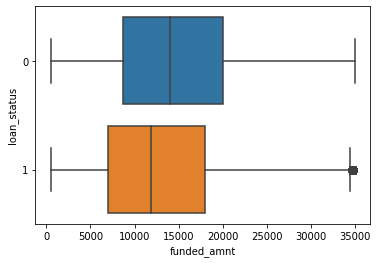

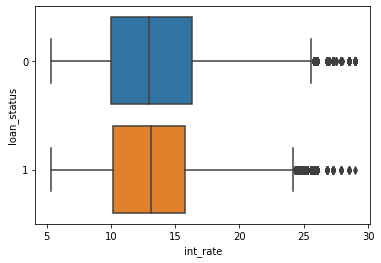

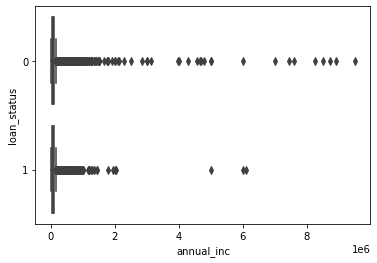

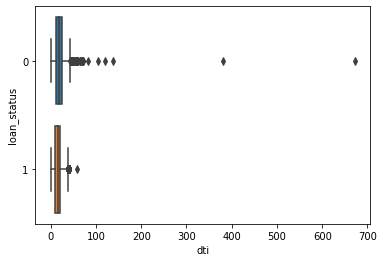

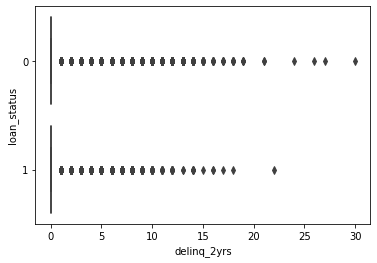

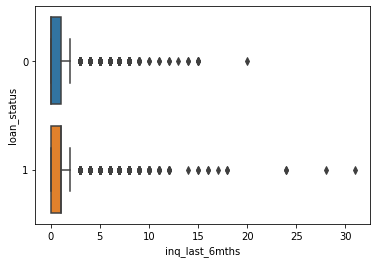

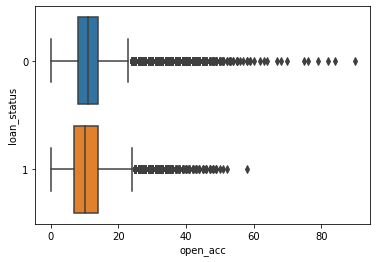

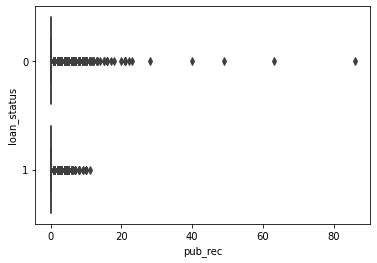

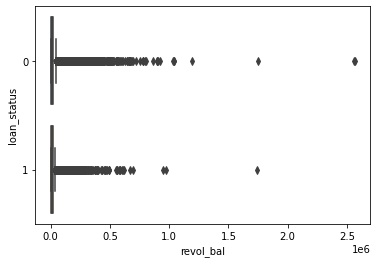

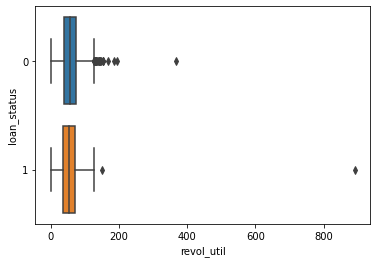

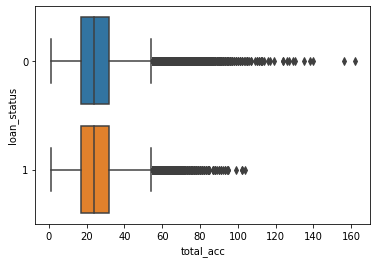

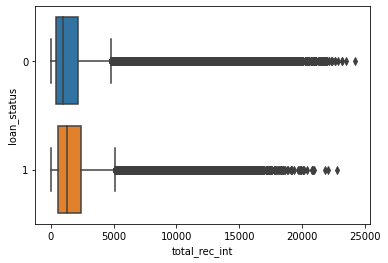

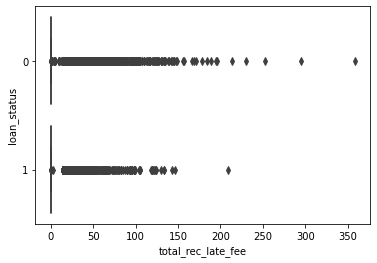

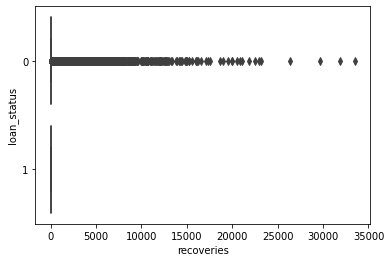

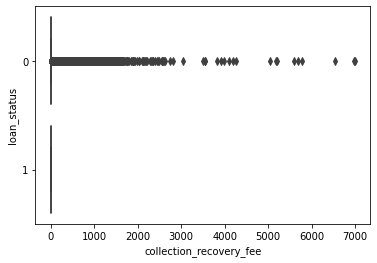

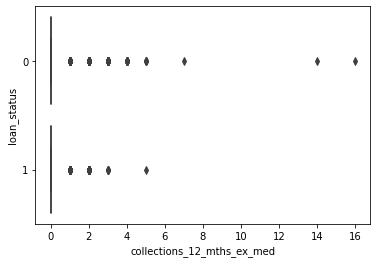

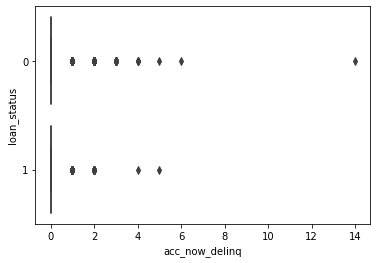

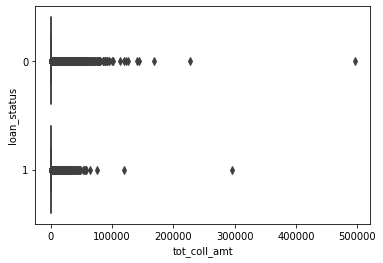

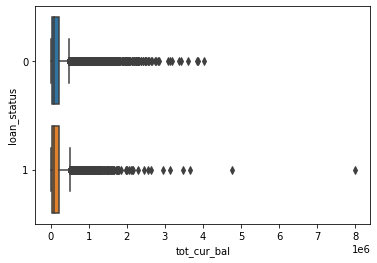

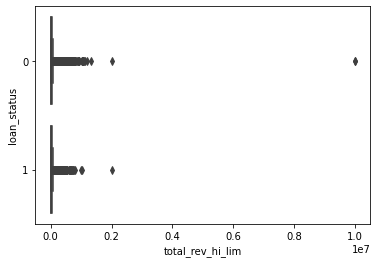

In [52]:
num_cols = ['funded_amnt','int_rate','annual_inc','dti','delinq_2yrs','inq_last_6mths',
              'open_acc','pub_rec','revol_bal','revol_util','total_acc','total_rec_int','total_rec_late_fee','recoveries',
                 'collection_recovery_fee','collections_12_mths_ex_med','acc_now_delinq','tot_coll_amt','tot_cur_bal',
                 'total_rev_hi_lim']
for col in num_cols:
    sns.boxplot(y = df['loan_status'].astype('category'), x = col, data=df)
    plt.show()

For numeric features, box plotted were plotted and among them, we saw that ‘revol_util’ and ‘inq_last_6mths’ show almost same variation irrespective of the target category. Thus, they are not good predictors of default. They have been dropped.

In [53]:
df.drop(['revol_util','inq_last_6mths'],axis=1,inplace=True)
df.head()

,funded_amnt,int_rate,sub_grade,annual_inc,dti,delinq_2yrs,open_acc,pub_rec,revol_bal,total_acc,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,collections_12_mths_ex_med,last_week_pay,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,loan_status,initial_list_status,term,verification_status0,verification_status1,verification_status2
0,14350,19.19,5.4,28700.0,33.88,0.0,14.0,1.0,22515.0,28.0,1173.84,0.0,0.0,0.0,0.0,26th week,0.0,0.0,28699.0,30800.0,0,0,0,0.0,1.0,0.0
1,4800,10.99,2.6,65000.0,3.64,0.0,6.0,0.0,7624.0,13.0,83.95,0.0,0.0,0.0,0.0,9th week,0.0,0.0,9974.0,32900.0,0,1,0,0.0,1.0,0.0
2,10000,7.26,1.6,45000.0,18.42,0.0,5.0,0.0,10877.0,19.0,56.47,0.0,0.0,0.0,0.0,9th week,0.0,65.0,38295.0,34900.0,0,1,0,1.0,0.0,0.0
3,15000,19.72,4.8,105000.0,14.97,0.0,10.0,0.0,13712.0,21.0,4858.62,0.0,0.0,0.0,0.0,135th week,0.0,0.0,55564.0,24700.0,0,0,0,1.0,0.0,0.0
4,16000,10.64,2.2,52000.0,20.16,0.0,11.0,0.0,35835.0,27.0,2296.41,0.0,0.0,0.0,0.0,96th week,0.0,0.0,47159.0,47033.0,0,1,0,0.0,0.0,1.0


The column 'last_week_pay' is numeric but the entries are in string form. We converted it to numeric values using the following code.

In [54]:
weeks = list(df['last_week_pay'].unique())
dir = {}
for week in weeks:
  wl = week.split('t')
  if(wl[0]=='NA'):
    dir[week] = np.nan
  else:
    dir[week] = int(wl[0])
for week in weeks:
  df.loc[df['last_week_pay']==week,'last_week_pay'] = dir[week]

df.head()

,funded_amnt,int_rate,sub_grade,annual_inc,dti,delinq_2yrs,open_acc,pub_rec,revol_bal,total_acc,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,collections_12_mths_ex_med,last_week_pay,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,loan_status,initial_list_status,term,verification_status0,verification_status1,verification_status2
0,14350,19.19,5.4,28700.0,33.88,0.0,14.0,1.0,22515.0,28.0,1173.84,0.0,0.0,0.0,0.0,26,0.0,0.0,28699.0,30800.0,0,0,0,0.0,1.0,0.0
1,4800,10.99,2.6,65000.0,3.64,0.0,6.0,0.0,7624.0,13.0,83.95,0.0,0.0,0.0,0.0,9,0.0,0.0,9974.0,32900.0,0,1,0,0.0,1.0,0.0
2,10000,7.26,1.6,45000.0,18.42,0.0,5.0,0.0,10877.0,19.0,56.47,0.0,0.0,0.0,0.0,9,0.0,65.0,38295.0,34900.0,0,1,0,1.0,0.0,0.0
3,15000,19.72,4.8,105000.0,14.97,0.0,10.0,0.0,13712.0,21.0,4858.62,0.0,0.0,0.0,0.0,135,0.0,0.0,55564.0,24700.0,0,0,0,1.0,0.0,0.0
4,16000,10.64,2.2,52000.0,20.16,0.0,11.0,0.0,35835.0,27.0,2296.41,0.0,0.0,0.0,0.0,96,0.0,0.0,47159.0,47033.0,0,1,0,0.0,0.0,1.0


The missing values have been handled by filling them with the mean values of the respective columns.

In [55]:
df[df.columns] = df[df.columns].fillna(df[df.columns].mean())
df.head()

,funded_amnt,int_rate,sub_grade,annual_inc,dti,delinq_2yrs,open_acc,pub_rec,revol_bal,total_acc,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,collections_12_mths_ex_med,last_week_pay,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,loan_status,initial_list_status,term,verification_status0,verification_status1,verification_status2
0,14350,19.19,5.4,28700.0,33.88,0.0,14.0,1.0,22515.0,28.0,1173.84,0.0,0.0,0.0,0.0,26.0,0.0,0.0,28699.0,30800.0,0,0,0,0.0,1.0,0.0
1,4800,10.99,2.6,65000.0,3.64,0.0,6.0,0.0,7624.0,13.0,83.95,0.0,0.0,0.0,0.0,9.0,0.0,0.0,9974.0,32900.0,0,1,0,0.0,1.0,0.0
2,10000,7.26,1.6,45000.0,18.42,0.0,5.0,0.0,10877.0,19.0,56.47,0.0,0.0,0.0,0.0,9.0,0.0,65.0,38295.0,34900.0,0,1,0,1.0,0.0,0.0
3,15000,19.72,4.8,105000.0,14.97,0.0,10.0,0.0,13712.0,21.0,4858.62,0.0,0.0,0.0,0.0,135.0,0.0,0.0,55564.0,24700.0,0,0,0,1.0,0.0,0.0
4,16000,10.64,2.2,52000.0,20.16,0.0,11.0,0.0,35835.0,27.0,2296.41,0.0,0.0,0.0,0.0,96.0,0.0,0.0,47159.0,47033.0,0,1,0,0.0,0.0,1.0


The final data consists of 5,32,428 records and 26 columns

In [56]:
df.shape

(532428, 26)

In [57]:
# Saving the processed data to a csv file
df.to_csv('/content/drive/MyDrive/DataCleaned.csv')